In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)


## Import the Data

In [2]:
# load the data
data = np.load(r'./data/features.npz')['arr_0']
labels = np.load(r'./data/labels.npy')
labels = labels.tolist()

In [3]:
colors_per_class = {
    'A549' : [254, 202, 87],
    'CACO-2' : [255, 107, 107],
    'HEK 293' : [10, 189, 227],
    'HeLa' : [255, 159, 243],
    'MCF7' : [16, 172, 132],
    'PC-3' : [128, 80, 128],
    'RT4' : [87, 101, 116],
    'U-2 OS' : [52, 31, 151],
    'U-251 MG' : [100, 100, 255],
}
colors = [colors_per_class[label] for label in labels]
colors = np.array(colors) / 255

### PCA

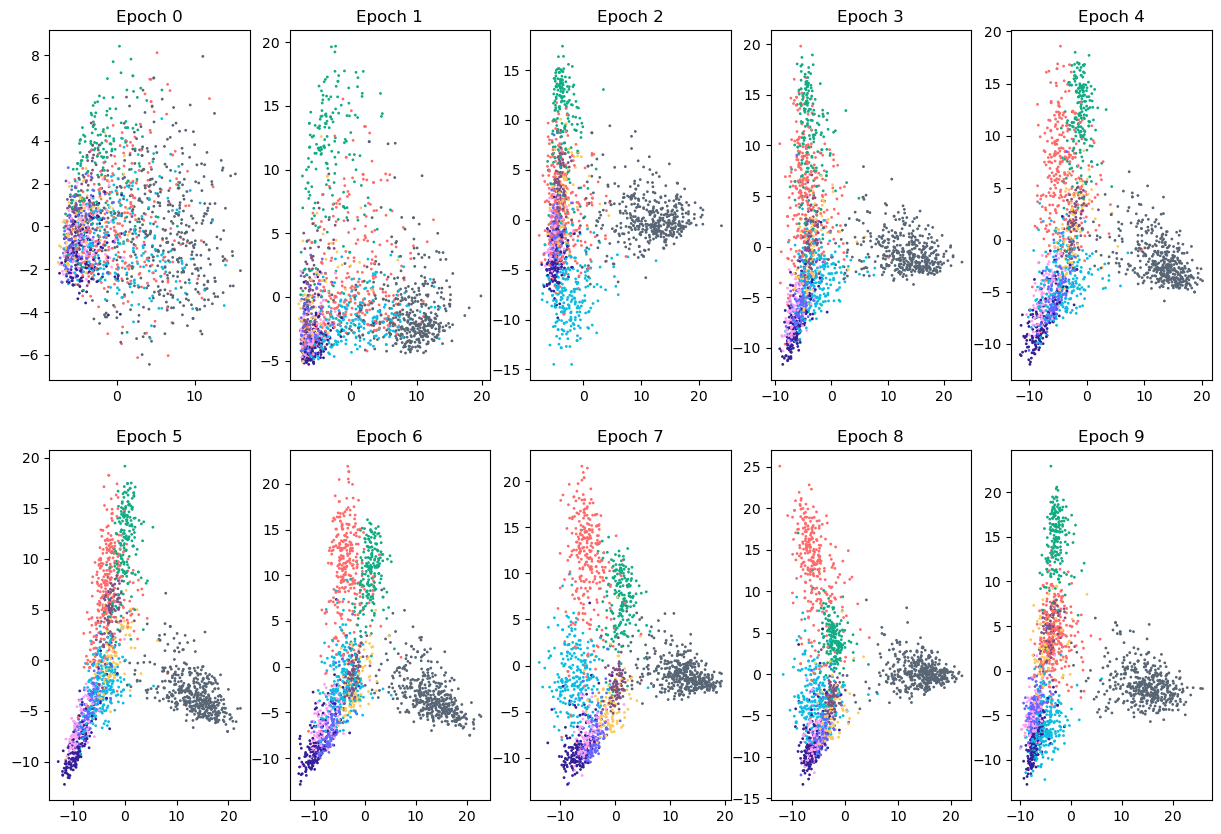

In [4]:
# plot the data which is 3d numpy array over every epoch. 
# Plot 2x5 subplots for every epoch and downproject the data to 2d using PCA and t-SNE
# add legend based on the class labels and the colors used for them in the scatter plot above

# plot the data
pca = PCA(n_components=2)
fig, ax = plt.subplots(2, 5, figsize=(15, 10))
for i in range(2):
    for j in range(5):
        data_2d = pca.fit_transform(data[i*5+j])
        ax[i, j].scatter(data_2d[:, 0], data_2d[:, 1], s=1, c=colors)
        ax[i, j].set_title('Epoch {}'.format(i*5+j))

plt.show()

### t-SNE

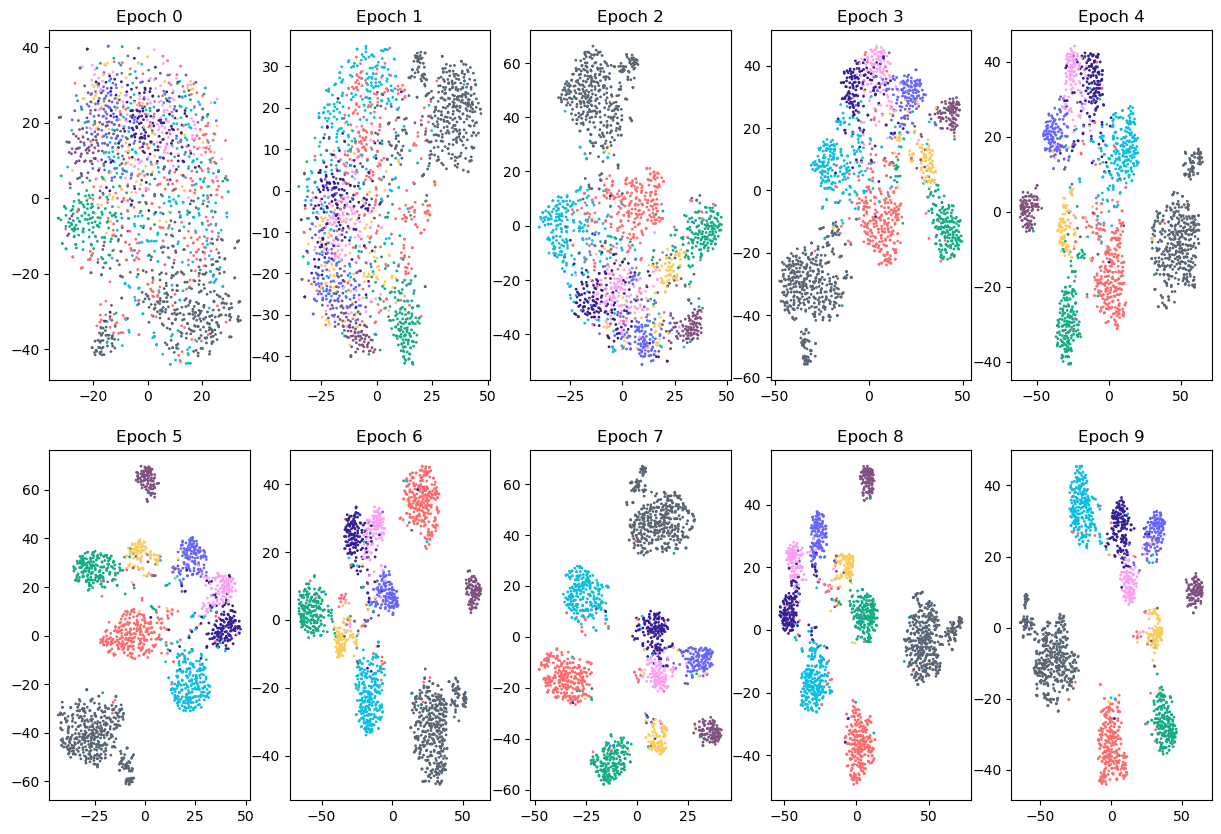

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(15, 10))
tsne = TSNE(n_components=2, verbose=0, n_jobs=-1)
for i in range(2):
    for j in range(5):
        data_2d = tsne.fit_transform(data[i*5+j])
        ax[i, j].scatter(data_2d[:, 0], data_2d[:, 1], s=1, c=colors)
        ax[i, j].set_title('Epoch {}'.format(i*5+j))
plt.show()

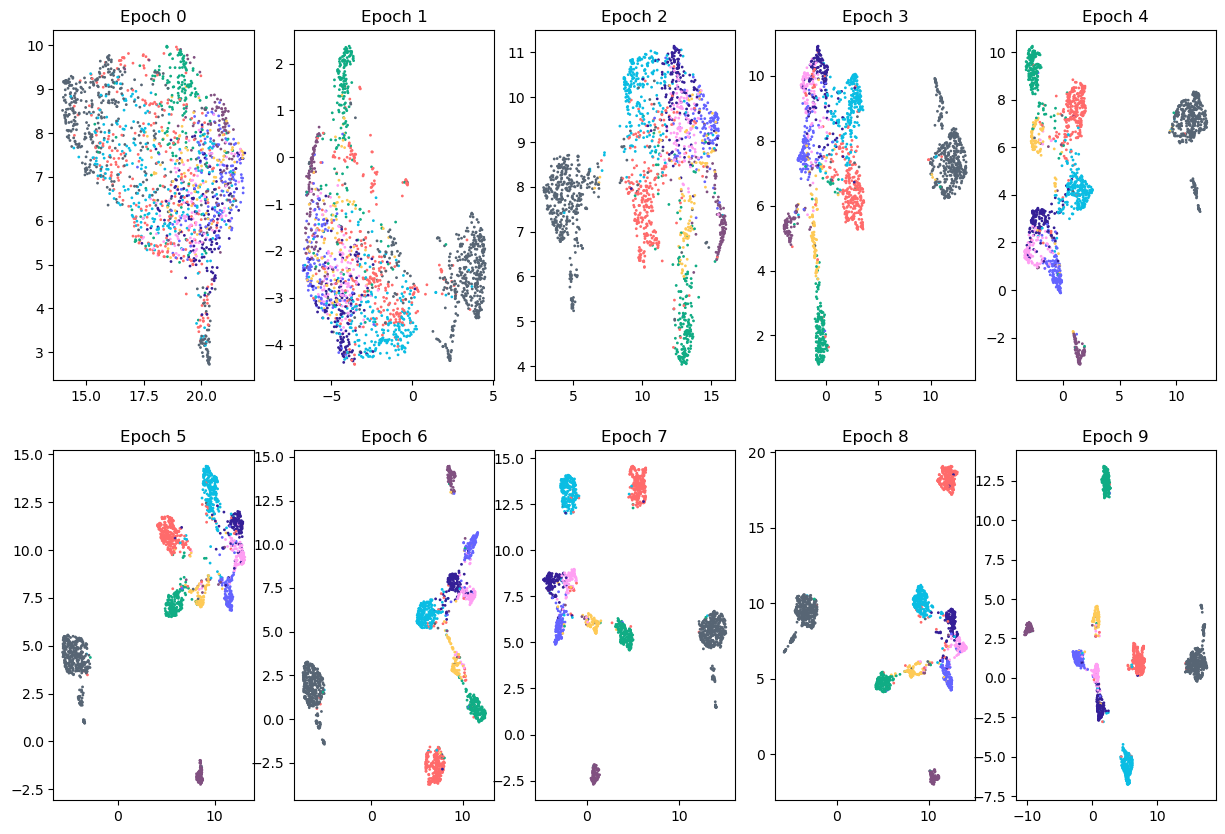

In [6]:
# plot the data which is 3d numpy array over every epoch. 
# Plot 2x5 subplots for every epoch and downproject the data to 2d using MAP
# add legend based on the class labels and the colors used for them in the scatter plot above

fig, ax = plt.subplots(2, 5, figsize=(15, 10))
umap = UMAP(n_components=2, verbose=0, n_jobs=-1)
for i in range(2):
    for j in range(5):
        data_2d = umap.fit_transform(data[i*5+j])
        ax[i, j].scatter(data_2d[:, 0], data_2d[:, 1], s=1, c=colors)
        ax[i, j].set_title('Epoch {}'.format(i*5+j))
plt.show()

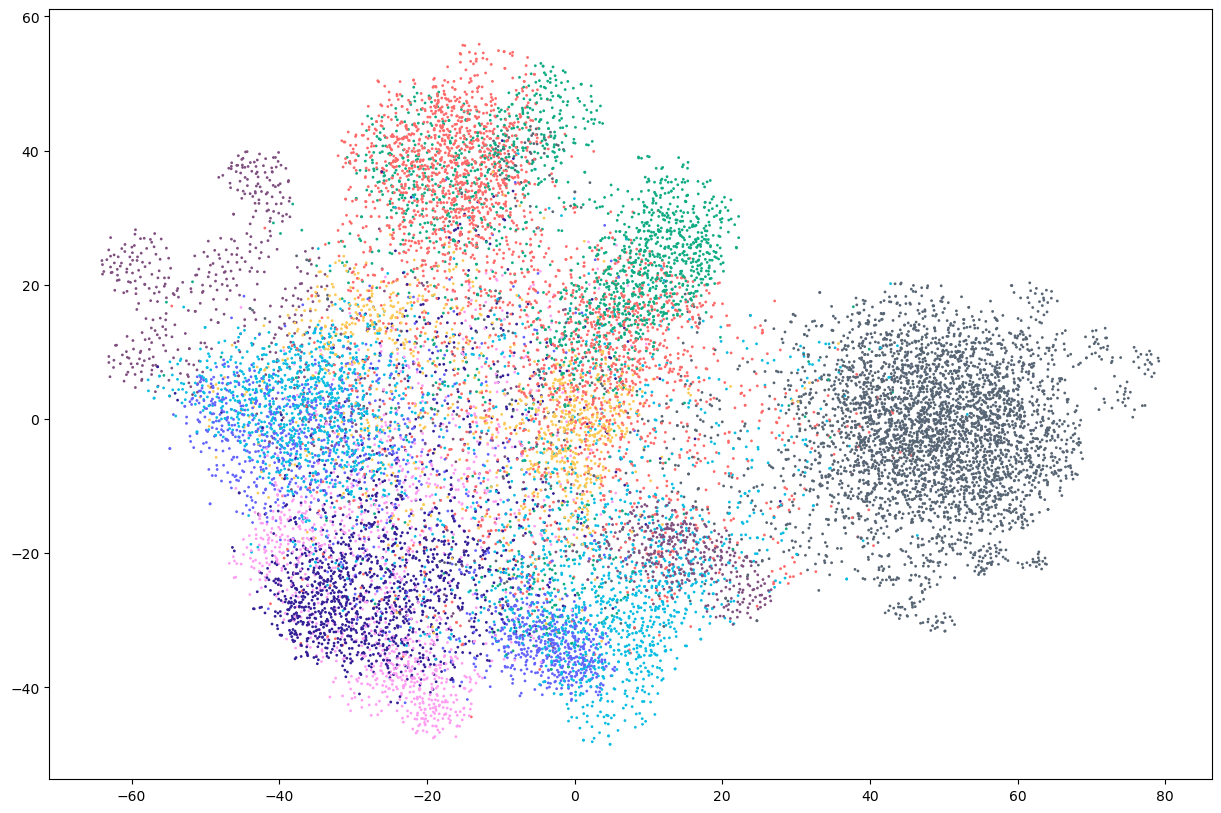

In [7]:
# plot the data
fig, ax = plt.subplots(figsize=(15, 10))
for i in range(10):
    tsne = TSNE(n_components=2,init="pca", verbose=0, n_jobs=-1)
    data_2d = tsne.fit_transform(data[i])
    ax.scatter(data_2d[:, 0], data_2d[:, 1], s=1, c=colors)
plt.show()

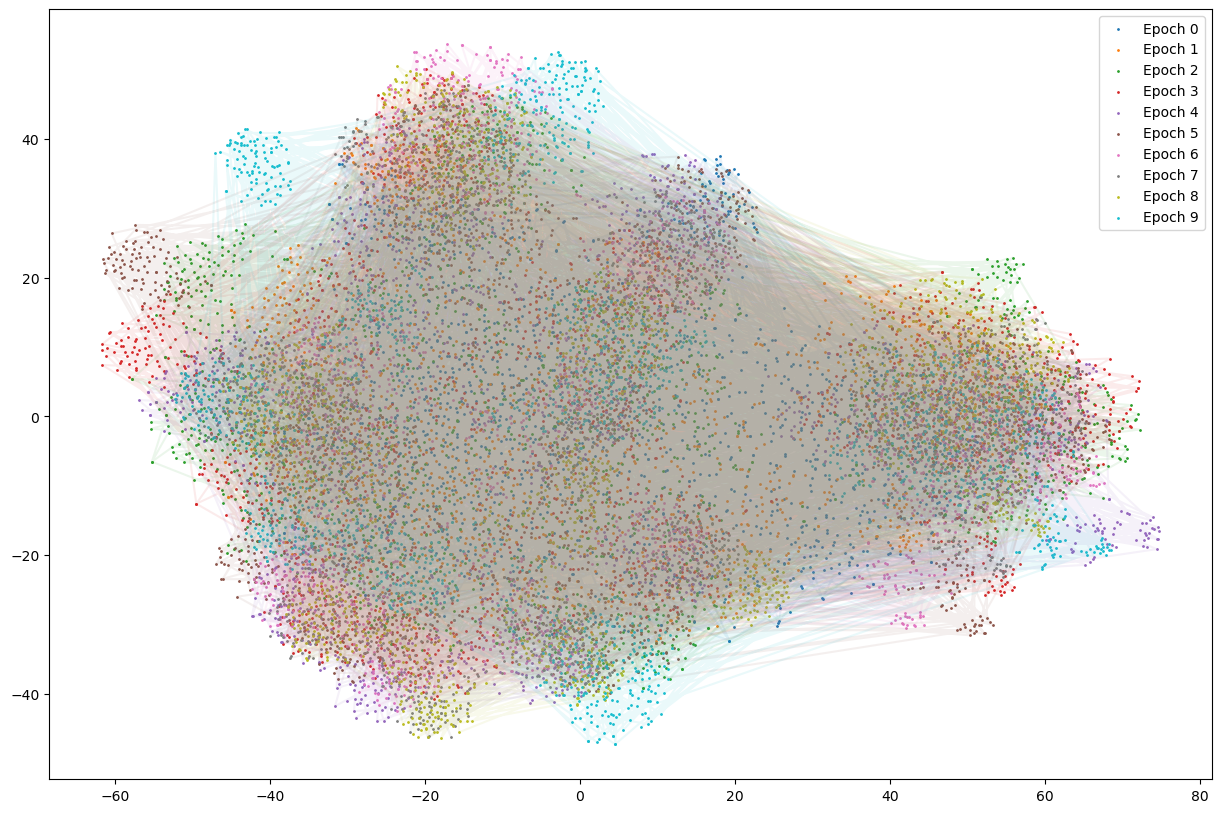

In [8]:
# plot one big image with all the data projected to 2d using t-SNE and colored by epoch number. 
# Connect the points with lines to see the evolution of the data over epochs.

# plot the data
fig, ax = plt.subplots(figsize=(15, 10))
tsne = TSNE(n_components=2,init="pca", verbose=0, n_jobs=-1)
for i in range(10):
    data_2d = tsne.fit_transform(data[i])
    ax.scatter(data_2d[:, 0], data_2d[:, 1], s=1, label='Epoch {}'.format(i))
    ax.plot(data_2d[:, 0], data_2d[:, 1], alpha=0.09)
ax.legend()
plt.show()

UMAP( verbose=1)
Sun Nov  6 23:58:59 2022 Construct fuzzy simplicial set
Sun Nov  6 23:59:00 2022 Finding Nearest Neighbors
Sun Nov  6 23:59:00 2022 Finished Nearest Neighbor Search
Sun Nov  6 23:59:00 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Nov  6 23:59:01 2022 Finished embedding


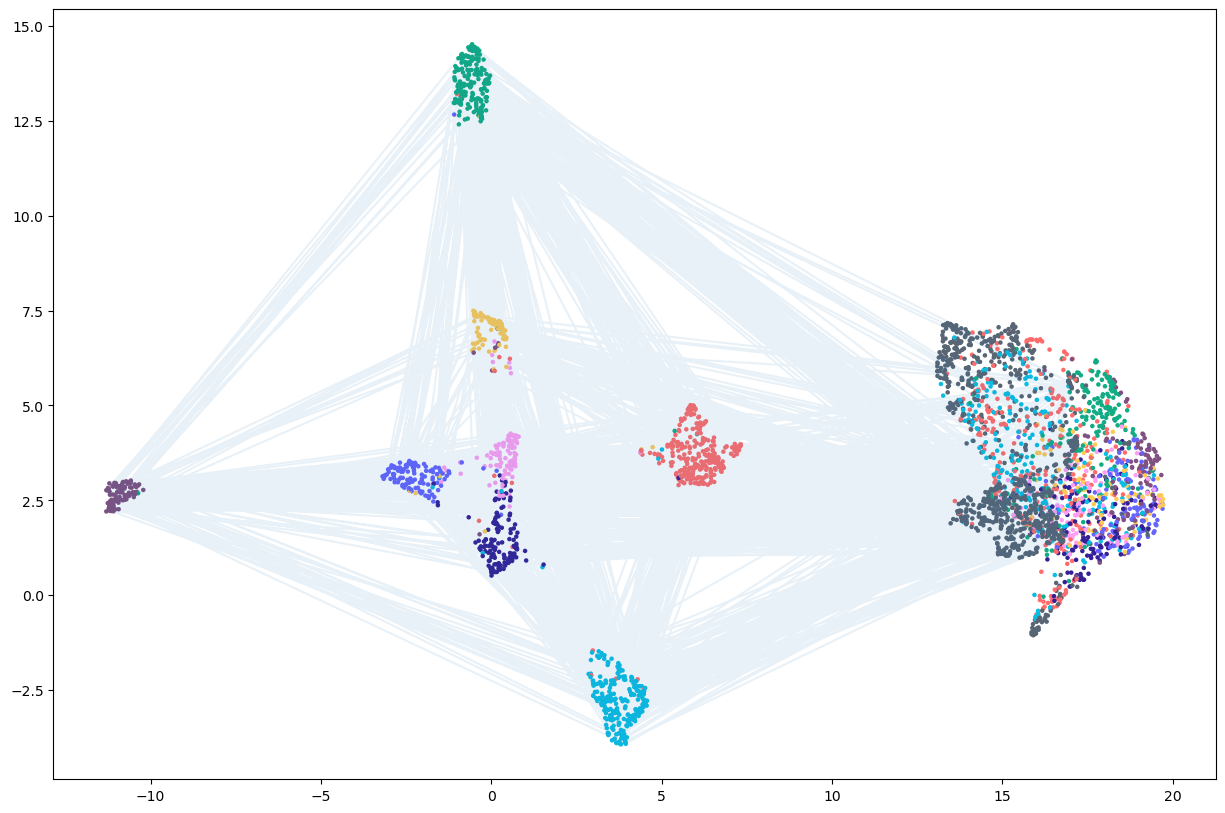

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))
umap = UMAP(n_components=2, verbose=0, n_jobs=-1)
data_2d_1 = umap.fit_transform(data[0])
ax.scatter(data_2d_1[:, 0], data_2d_1[:, 1],s=5, c=colors)
#ax.plot(data_2d[:, 0], data_2d[:, 1], alpha=0.1)
umap = UMAP(n_components=2, verbose=1, n_jobs=-1)
data_2d = umap.fit_transform(data[9])
ax.scatter(data_2d[:, 0], data_2d[:, 1],s=5, c=colors)
ax.plot(data_2d[:, 0], data_2d[:, 1], alpha=0.1)
plt.show()

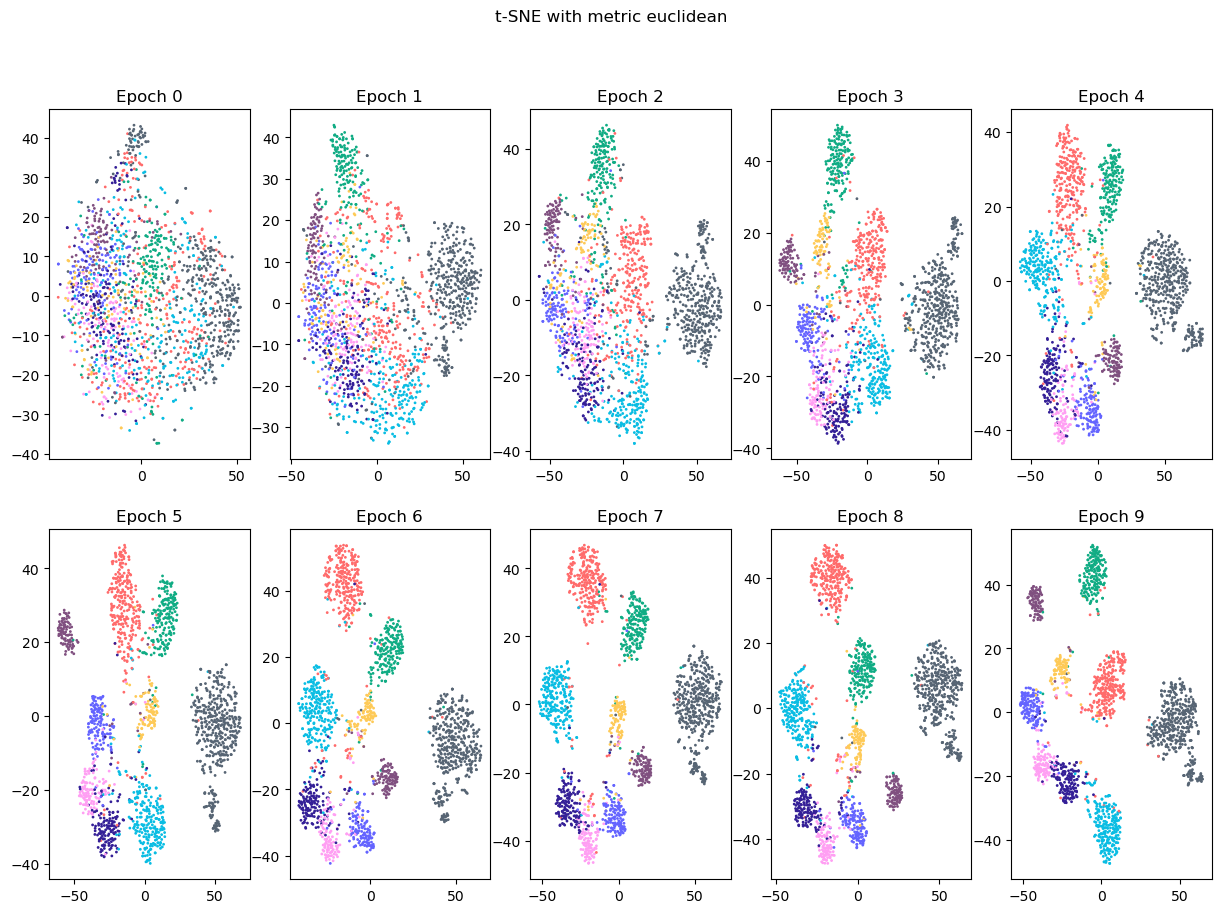

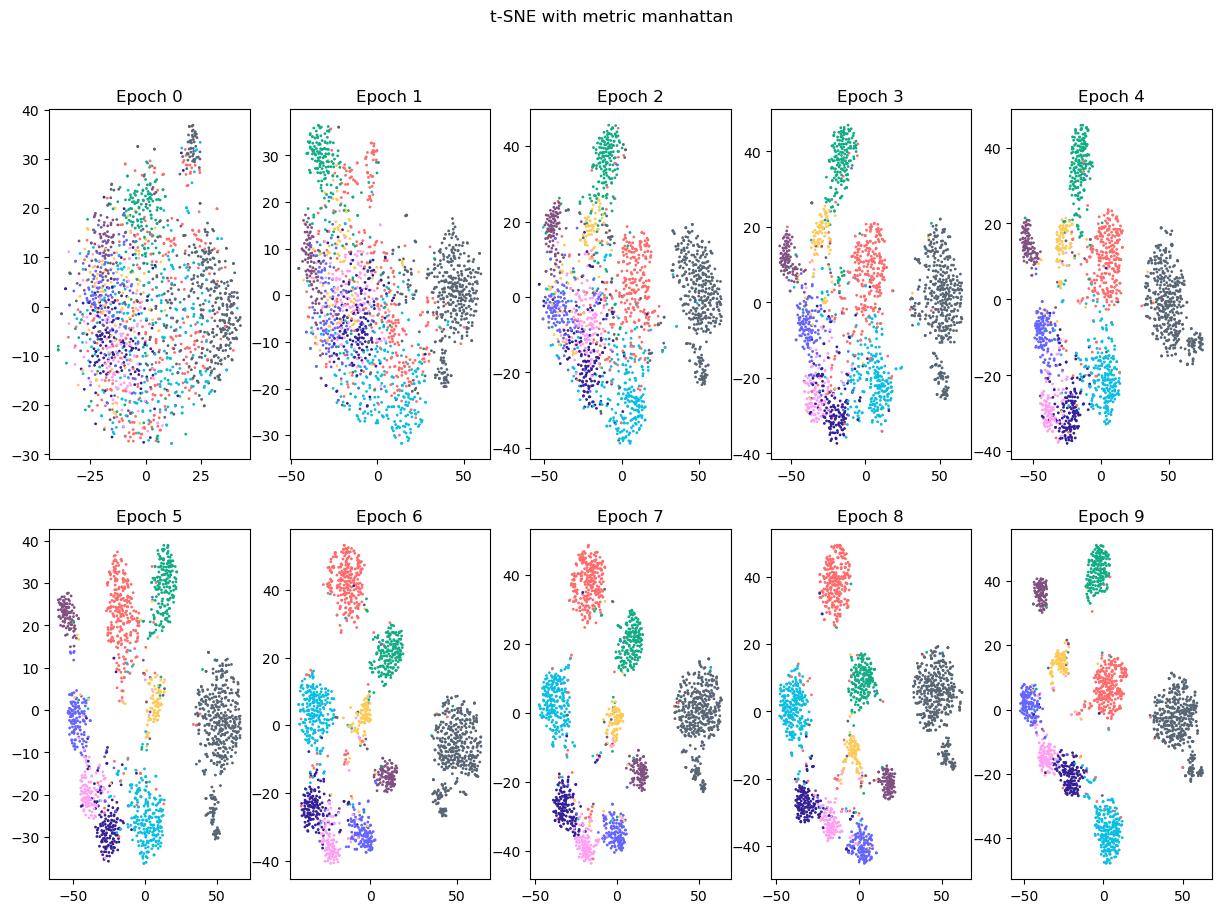

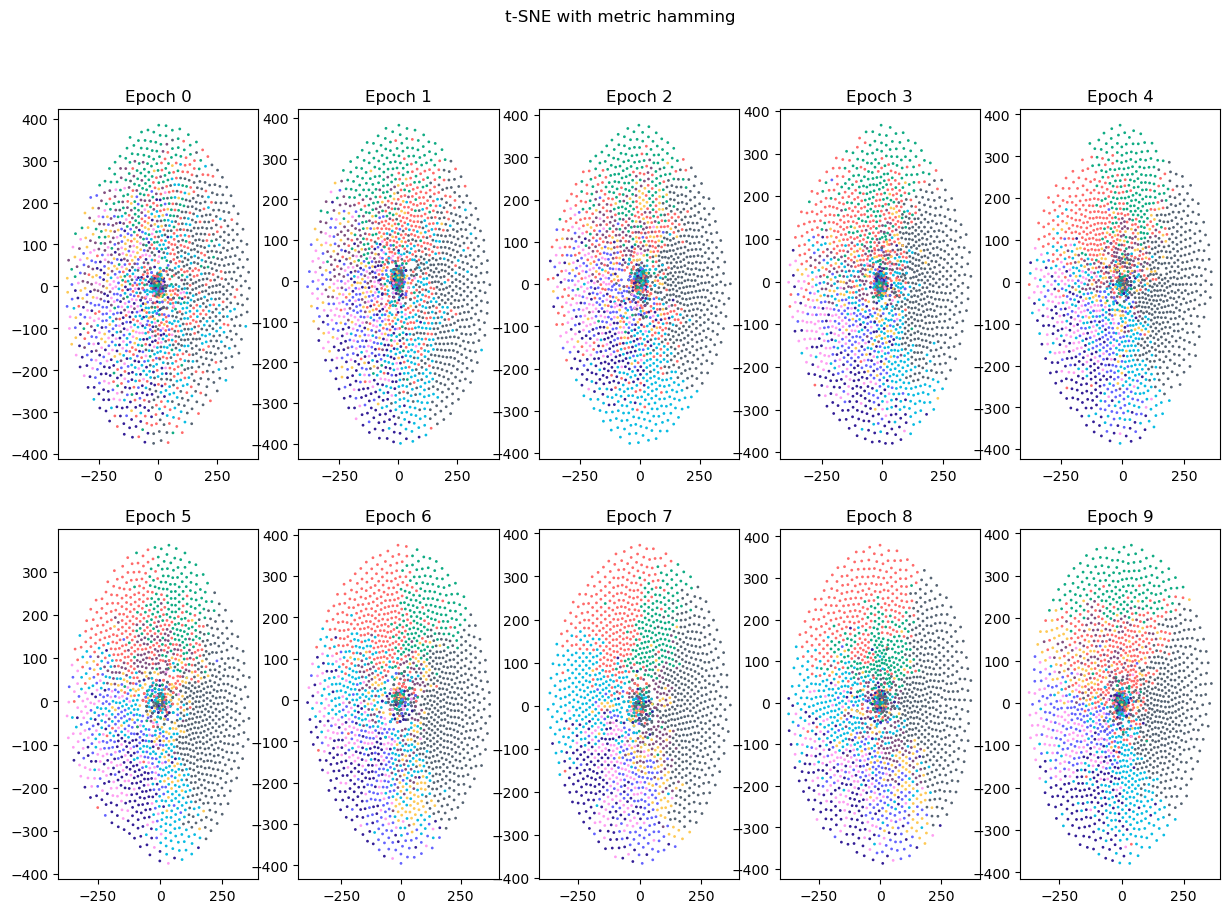

In [10]:
TSNE_METRICS = ['euclidean','manhattan','hamming']
# plot the data which is 3d numpy array over every epoch. 
# Plot 2x5 subplots for every epoch and downproject the data to 2d using t-SNE with different metrics and perplexity values add titel with the metric and perplexity value
# add legend based on the class labels and the colors used for them in the scatter plot above


for metric in TSNE_METRICS:
    fig, ax = plt.subplots(2, 5, figsize=(15, 10))
    for i in range(2):
        for j in range(5):
            tsne = TSNE(n_components=2,init="pca", verbose=0, n_jobs=-1, metric=metric)
            data_2d = tsne.fit_transform(data[i*5+j])
            ax[i, j].scatter(data_2d[:, 0], data_2d[:, 1], s=1, c=colors)
            ax[i, j].set_title('Epoch {}'.format(i*5+j))
    fig.suptitle('t-SNE with metric {}'.format(metric))
    plt.show()

In [ ]:
UMAP_METRICS = ["euclidean","manhattan","chebyshev","canberra","braycurtis","cosine","correlation","hamming","jaccard","dice","kulsinski","ll_dirichlet","hellinger","rogerstanimoto","sokalmichener","sokalsneath","yule"]

for metric in UMAP_METRICS:
    fig, ax = plt.subplots(2, 5, figsize=(15, 10))
    umap = UMAP(n_components=2, metric=metric, verbose=0, n_jobs=-1)
    for i in range(2):
        for j in range(5):
            data_2d = umap.fit_transform(data[i*5+j])
            ax[i, j].scatter(data_2d[:, 0], data_2d[:, 1], s=1, c=colors)
            ax[i, j].set_title('Epoch {}'.format(i*5+j, metric))
    fig.suptitle('UMAP with metric {}'.format(metric))
    plt.show()